# Importing Libraries

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [2]:
df = pd.read_csv('DataFiles/cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Splitting Data
All numerical except for the target and the ID. Dropping the ID, splitting, and creating a StandardScaler to scale the data

In [4]:
X = df.drop(columns = ['id','diagnosis'])
y = df['diagnosis']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print(f'Feature Training: {X_train.shape}')
print(f'Feature Testing: {X_test.shape}')
print(f'Target Training: {y_train.shape}')
print(f'Target Testing: {y_test.shape}')

Feature Training: (426, 30)
Feature Testing: (143, 30)
Target Training: (426,)
Target Testing: (143,)


In [6]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
scaler = StandardScaler()
scaleddf = pd.DataFrame(scaler.fit_transform(X_train), columns = [X.columns])
scaleddf.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,426.0,-6.588366e-16,1.001176,-1.821698,-0.681236,-0.241508,0.460925,3.961758
texture_mean,426.0,-2.272569e-16,1.001176,-2.245464,-0.714388,-0.120415,0.565256,4.752051
perimeter_mean,426.0,-2.731253e-16,1.001176,-1.811055,-0.674847,-0.245100,0.506262,3.979870
area_mean,426.0,4.503440e-16,1.001176,-1.360924,-0.655210,-0.306917,0.352451,5.185291
smoothness_mean,426.0,2.918896e-16,1.001176,-3.076187,-0.742686,-0.085006,0.624809,4.861839
compactness_mean,426.0,-2.981444e-16,1.001176,-1.616996,-0.778996,-0.233459,0.545989,4.063429
concavity_mean,426.0,3.440128e-17,1.001176,-1.113998,-0.745012,-0.332025,0.526045,4.321607
concave points_mean,426.0,2.668705e-16,1.001176,-1.262519,-0.725055,-0.388166,0.599167,4.057905
symmetry_mean,426.0,-1.086246e-15,1.001176,-2.364007,-0.694347,-0.069975,0.573063,4.628217
fractal_dimension_mean,426.0,-7.729863e-16,1.001176,-1.751926,-0.706044,-0.181718,0.466590,4.825355


# Modeling
Scaler works. I'll load the scaler into a pipeline and start modeling

## Decision Tree Classifer

In [8]:
dectree = DecisionTreeClassifier(random_state=42)
DTpipe = make_pipeline(scaler,dectree)

DTpipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [9]:
DTpipe.score(X_test,y_test)

0.951048951048951

The decision tree scored a 95 for accuracy. I'm going to store the result in a dataframe to show at the end of the analysis

In [10]:
score_df = pd.DataFrame()
score_df.loc['DTClassifier','Accuracy'] = DTpipe.score(X_test, y_test)
score_df

,Accuracy
DTClassifier,0.951049


## Bagging Tree

In [11]:
bagtree = BaggingClassifier(random_state = 42)
BAGpipe = make_pipeline(scaler, bagtree)

BAGpipe.fit(X_train, y_train)
BAGpipe.score(X_test,y_test)

0.951048951048951

In [12]:
score_df.loc['BagClassifier','Accuracy'] = BAGpipe.score(X_test,y_test)
score_df

,Accuracy
DTClassifier,0.951049
BagClassifier,0.951049


Feels like i did everything correctly but the same accuracy was generated from both the DT and the bagged tree. lets try Random forest now

## Random Forest

In [13]:
rf = RandomForestClassifier(random_state=42)
RFpipe = make_pipeline(scaler, rf)

RFpipe.fit(X_train, y_train)
RFpipe.score(X_test, y_test)

0.965034965034965

In [14]:
score_df.loc['RFClassifier','Accuracy'] = RFpipe.score(X_test, y_test)

In [15]:
score_df

,Accuracy
DTClassifier,0.951049
BagClassifier,0.951049
RFClassifier,0.965035


the RF classifier was the best model without hyperparameter tuning.

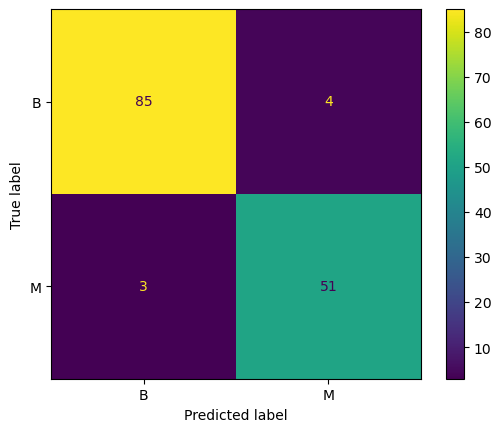

In [ ]:
ConfusionMatrixDisplay.from_estimator(DTpipe, X_test, y_test)

In [25]:
accuracy = (85+51)/(85+51+4+3)
print(f'The calculated accuracy is: {accuracy}')


The calculated accuracy is: 0.951048951048951


In [ ]:
cm = confusion_matrix(y_test.values, DTpipe.predict(X_test))


2. The positive condition in this data set is Malignant
3. There were 4 false positives
4. There were 3 false negatives
5. False negatives are more problematic, and we should aim our model to reduce the false negatives as much as possible.